In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_excel('/content/fraud_detection.csv.xlsx')
df.head()


,user_id,transaction_id,transaction_amount,transaction_type,location,timestamp,is_fraud
0,1,1001,150,Credit,New York,2025-04-21 10:00:00,0
1,2,1002,5000,Debit,Los Angeles,2025-04-21 10:15:00,1
2,3,1003,100,Credit,Chicago,2025-04-21 10:20:00,0
3,4,1004,2000,Credit,Miami,2025-04-21 10:25:00,1
4,5,1005,1000,Debit,Dallas,2025-04-21 10:30:00,0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


le_type = LabelEncoder()
le_location = LabelEncoder()

df['transaction_type'] = le_type.fit_transform(df['transaction_type'])
df['location'] = le_location.fit_transform(df['location'])


df_model = df.drop(['user_id', 'transaction_id', 'timestamp'], axis=1)


In [ ]:
X = df_model.drop('is_fraud', axis=1)
y = df_model['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.57      1.00      0.73         4

    accuracy                           0.80        15
   macro avg       0.79      0.86      0.78        15
weighted avg       0.89      0.80      0.81        15



<Figure size 600x600 with 0 Axes>

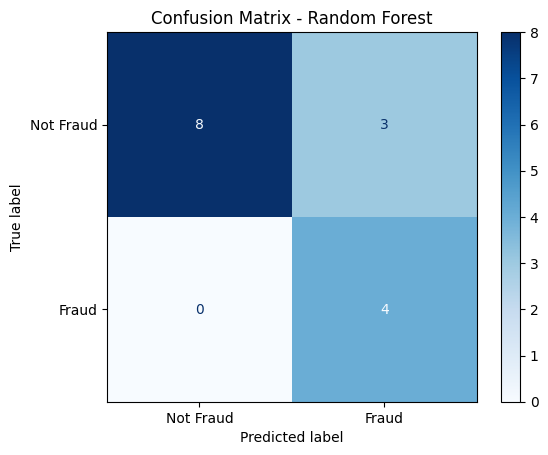

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
model_filename = '/content/fraud_detection_rf_model (1).pkl'
joblib.dump(rf_model, model_filename)

print(f"Model saved to: {model_filename}")



Model saved to: /content/fraud_detection_rf_model (1).pkl
